In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
picher_file_path = '/content/drive/MyDrive/이것이데이터분석이다/ch3/picher_stats_2017.csv'
batter_file_path = '/content/drive/MyDrive/이것이데이터분석이다/ch3/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

### [프로야구 연봉 데이터셋의 기본정보]

In [ ]:
# 컬럼명 확인하기
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [ ]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [ ]:
print(picher.shape)

(152, 22)


In [ ]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

Unknown system... sorry~~~~


In [ ]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

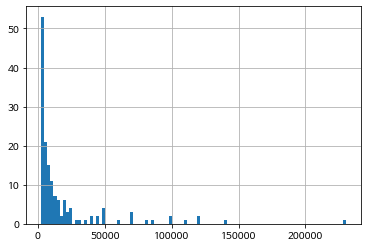

In [ ]:
picher['연봉(2018)'].hist(bins=100)

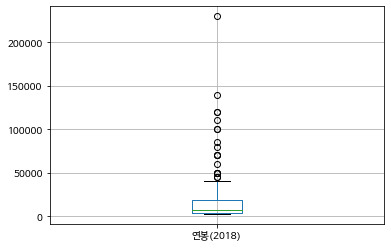

In [ ]:
picher.boxplot(column=['연봉(2018)'])

### 회귀 분석에 사용할 피처 살펴보기

In [ ]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

In [ ]:
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

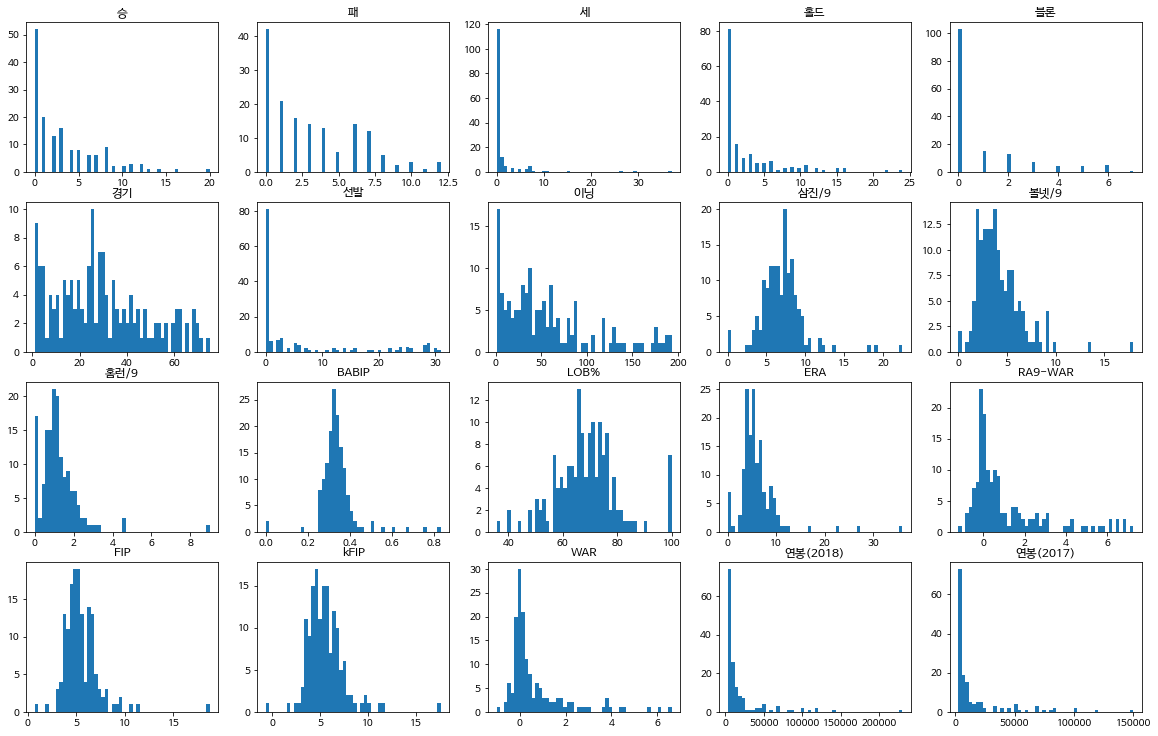

In [ ]:
plot_hist_each_column(picher_features_df)

## 투수의 연봉 예측하기

### [피처 스케일링]

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x : (x - series_mean)/series_std)
    return df

In [ ]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

In [ ]:
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


### [피처들의 단위 맞춰주기 : one-hot-encoding]

In [ ]:
# 팀명 피처를 원핫 인코딩
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)

In [ ]:
team_encoding

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
147,0,0,0,0,0,0,0,0,1
148,1,0,0,0,0,0,0,0,0
149,0,0,0,0,0,0,1,0,0
150,0,0,0,0,0,0,0,1,0


In [ ]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


In [ ]:
picher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   승         152 non-null    float64
 2   패         152 non-null    float64
 3   세         152 non-null    float64
 4   홀드        152 non-null    float64
 5   블론        152 non-null    float64
 6   경기        152 non-null    float64
 7   선발        152 non-null    float64
 8   이닝        152 non-null    float64
 9   삼진/9      152 non-null    float64
 10  볼넷/9      152 non-null    float64
 11  홈런/9      152 non-null    float64
 12  BABIP     152 non-null    float64
 13  LOB%      152 non-null    float64
 14  ERA       152 non-null    float64
 15  RA9-WAR   152 non-null    float64
 16  FIP       152 non-null    float64
 17  kFIP      152 non-null    float64
 18  WAR       152 non-null    float64
 19  y         152 non-null    int64  
 20  연봉(2017)  152 non-null    float6

### [회귀 분석 적용하기]
회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터 분리
x = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=112)

회귀 분석 계수 학습 & 학습된 계수 출력

In [ ]:
# 모델 학습
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

# 학습된 계수 출력
print(lr.coef_)

[ -1766.55024145   1729.06461972  21102.33224892   3116.05491809
   1637.95339578   2293.15179364    779.62558397  -1942.02981222
  -2476.76933606   1656.88299127  12243.49209991 -18079.18710457
  -3951.84594993  -5144.14721623   -897.03320943    323.25369631
    442.00883477  -3243.06132425  -2186.33899253  -7864.16975117
    146.68179301   4563.72871123  22027.54964372   5663.95235192
  -1181.11210347   2522.22846336    163.3499846   -2306.20904031]


## 예측 모델 평가하기 
### [어떤 피처가 가장 영향력이 강한 피처일까?]

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     38.89
Date:                Wed, 25 May 2022   Prob (F-statistic):           1.65e-39
Time:                        15:05:11   Log-Likelihood:                -1272.0
No. Observations:                 121   AIC:                             2600.
Df Residuals:                      93   BIC:                             2678.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.717e+04    853.256     20.118      0.000    1.55e+04    1.89e+04
BABIP      -1766.5502   1568.576     -1.126      0.263   -4881.432    1348.332
ERA         1729.0646   2985.164      0.579      0.564   -4198.879    7657.009
FIP          2.11e+04   1.06e+05      0.198      0.843    -1.9e+05    2.32e+05
KIA         5023.3526   3063.986      1.639      0.104   -1061.116    1.11e+04
KT          3545.2511   2605.572      1.361      0.177   -1628.899    8719.401
LG          4200.4495   2910.490      1.443      0.152   -1579.206    9980.105
LOB%         779.6256   1981.678      0.393      0.695   -3155.595    4714.846
NC           -34.7321   2943.536     -0.012      0.991   -5880.011    5810.547
RA9-WAR    -2476.7693   3371.503     -0.735      0.464   -9171.906    4218.367
SK          3564.1807   3138.753      1.136      0.259   -2668.761    9797.123
WAR         1.224e+04   2913.430      4.202      0.000    6457.997     1.8e+04
kFIP       -1.808e+04   9.03e+04     -0.200      0.842   -1.97e+05    1.61e+05
경기         -3951.8459   3498.538     -1.130      0.262   -1.09e+04    2995.557
두산         -3236.8495   2909.571     -1.112      0.269   -9014.681    2540.982
롯데          1010.2645   3073.400      0.329      0.743   -5092.899    7113.428
볼넷/9         323.2537   6869.080      0.047      0.963   -1.33e+04     1.4e+04
블론           442.0088   1685.621      0.262      0.794   -2905.301    3789.318
삼성         -1335.7636   2812.013     -0.475      0.636   -6919.864    4248.336
삼진/9       -2186.3390   8399.232     -0.260      0.795   -1.89e+04    1.45e+04
선발         -7864.1698   6016.510     -1.307      0.194   -1.98e+04    4083.427
세            146.6818   1640.070      0.089      0.929   -3110.172    3403.535
승           4563.7287   2568.272      1.777      0.079    -536.351    9663.808
연봉(2017)    2.203e+04   1427.258     15.433      0.000    1.92e+04    2.49e+04
이닝          5663.9524   7528.023      0.752      0.454   -9285.209    2.06e+04
패          -1181.1121   2223.506     -0.531      0.597   -5596.554    3234.330
한화          4429.5262   2603.153      1.702      0.092    -739.819    9598.872
홀드           163.3500   1718.315      0.095      0.924   -3248.883    3575.583
홈런/9       -2306.2090   1.85e+04     -0.125      0.901    -3.9e+04    3.43e+04
==============================================================================
Omnibus:                       28.804   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.439
Skew:                           0.027   Prob(JB):                     2.12e-66
Kurtosis:                      10.745   Cond. No.                     2.73e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [ ]:
print(model.params)

const       17165.679229
BABIP       -1766.550241
ERA          1729.064620
FIP         21102.332249
KIA          5023.352610
KT           3545.251088
LG           4200.449486
LOB%          779.625584
NC            -34.732120
RA9-WAR     -2476.769336
SK           3564.180683
WAR         12243.492100
kFIP       -18079.187105
경기          -3951.845950
두산          -3236.849524
롯데           1010.264483
볼넷/9          323.253696
블론            442.008835
삼성          -1335.763632
삼진/9        -2186.338993
선발          -7864.169751
세             146.681793
승            4563.728711
연봉(2017)    22027.549644
이닝           5663.952352
패           -1181.112103
한화           4429.526156
홀드            163.349985
홈런/9        -2306.209040
dtype: float64


[Text(0, 0, 'const'),
 Text(0, 0, 'BABIP'),
 Text(0, 0, 'ERA'),
 Text(0, 0, 'FIP'),
 Text(0, 0, 'KIA'),
 Text(0, 0, 'KT'),
 Text(0, 0, 'LG'),
 Text(0, 0, 'LOB%'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'RA9-WAR'),
 Text(0, 0, 'SK'),
 Text(0, 0, 'WAR'),
 Text(0, 0, 'kFIP'),
 Text(0, 0, '경기'),
 Text(0, 0, '두산'),
 Text(0, 0, '롯데'),
 Text(0, 0, '볼넷/9'),
 Text(0, 0, '블론'),
 Text(0, 0, '삼성'),
 Text(0, 0, '삼진/9'),
 Text(0, 0, '선발'),
 Text(0, 0, '세'),
 Text(0, 0, '승'),
 Text(0, 0, '연봉(2017)'),
 Text(0, 0, '이닝'),
 Text(0, 0, '패'),
 Text(0, 0, '한화'),
 Text(0, 0, '홀드'),
 Text(0, 0, '홈런/9')]

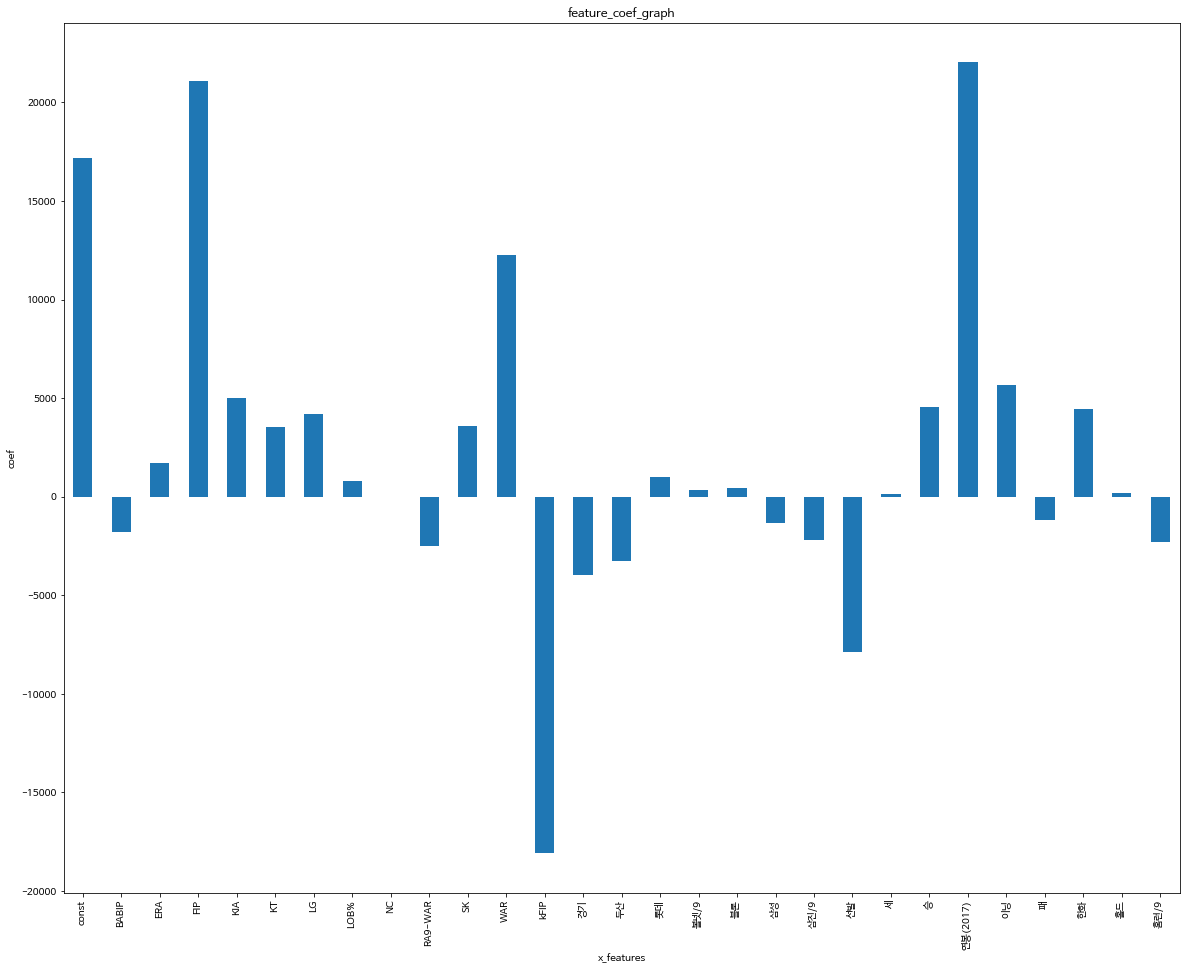

In [ ]:
# 회귀 계수를 리스트로 변환
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 변환
x_labels = model.params.index.tolist()

# 회귀 계수를 출력
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

### [예측 모델의 평가]

In [ ]:
x = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

In [ ]:
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

R2 score

In [ ]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9276949405576705
0.8860171644977817


RMSE score

In [ ]:
y_pred = lr.predict(x_train)
print(sqrt(mean_squared_error(y_train, y_pred)))
y_pred = lr.predict(x_test)
print(sqrt(mean_squared_error(y_test, y_pred)))

7282.718684746374
14310.696436889135


### [피처들의 상관관계 분석]

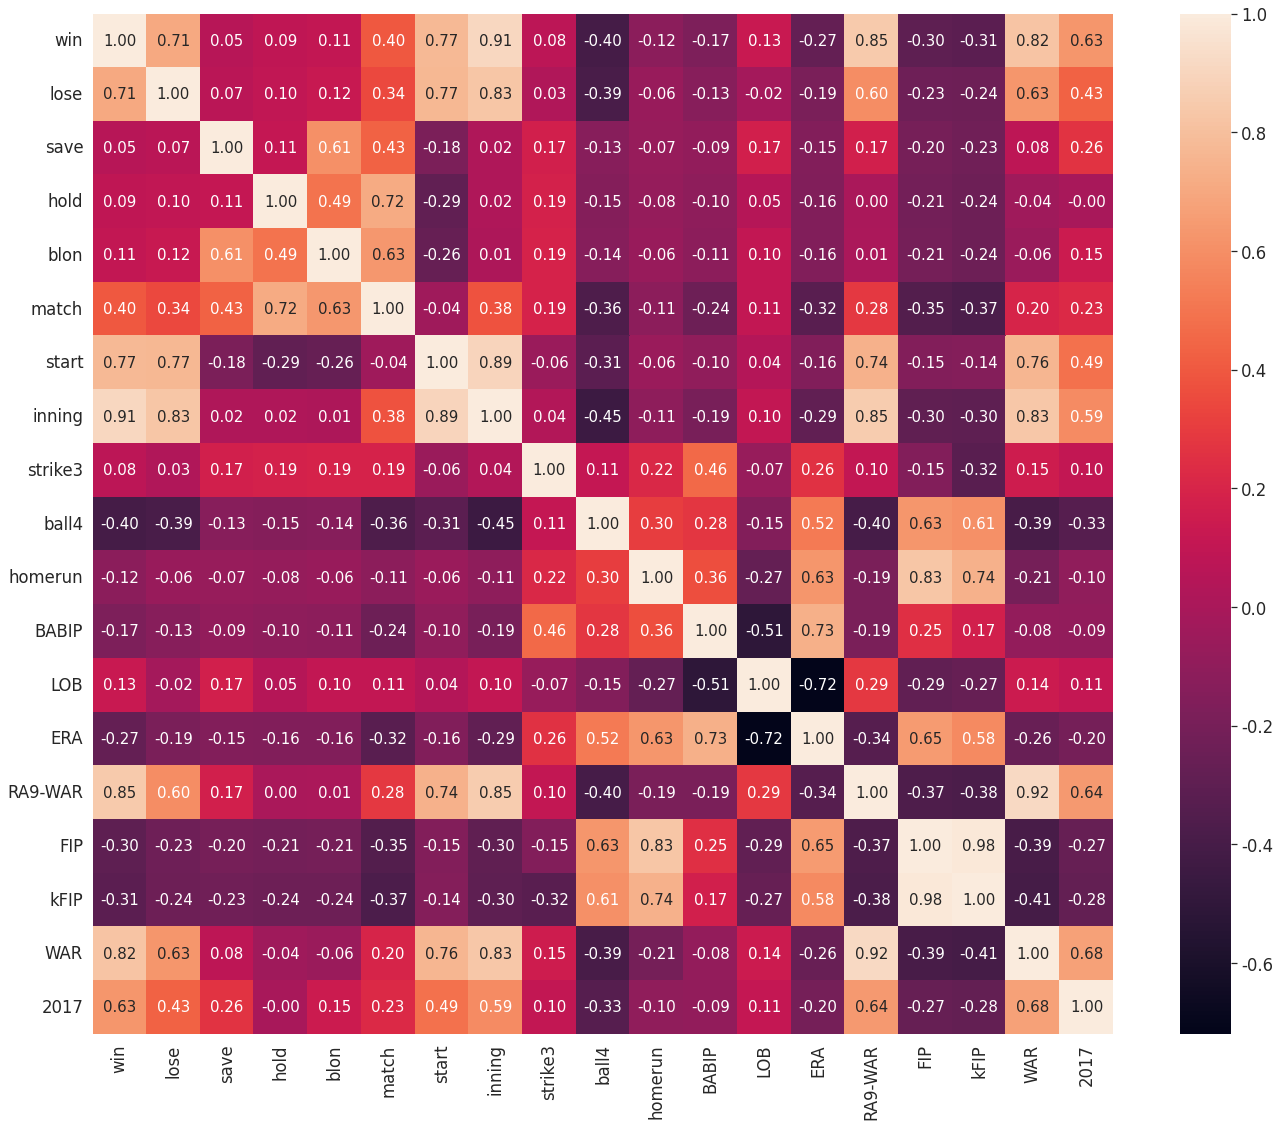

In [ ]:
import seaborn as sns

corr =picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

### [회귀분석 예측 성능을 높이기 위한 방법 : 다중공선성 확인]

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
print(x.shape)
print(x.values)

(152, 28)
[[ 0.01678276 -0.58705567 -0.9710297  ...  0.         -0.58570521
  -0.44238194]
 [-0.24168646 -0.51985532 -1.06188793 ...  0.         -0.58570521
  -0.66852133]
 [-0.09559517 -0.62545587 -0.83741467 ...  0.         -0.58570521
  -0.4128855 ]
 ...
 [ 0.46629444  1.34735434  1.34852735 ...  0.         -0.58570521
   1.21925095]
 [ 0.00554496 -0.06625297  0.72855357 ...  0.         -0.36424453
   0.22620407]
 [-0.32035101  0.38974939  1.11870948 ...  0.         -0.58570521
   0.77680432]]


In [ ]:
# 피처마다의 vif 계수를 출력
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['features'] = x.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


### [적절한 피처로 다시 학습하기]

In [ ]:
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [ ]:
# 결과를 출력합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9150591192570362
0.9038759653889863


In [ ]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7893.462873347693
13141.866063591095


In [ ]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


## 분석 결과의 시각화 
### [예상 연봉과 실제 연봉 비교]

In [ ]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [ ]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


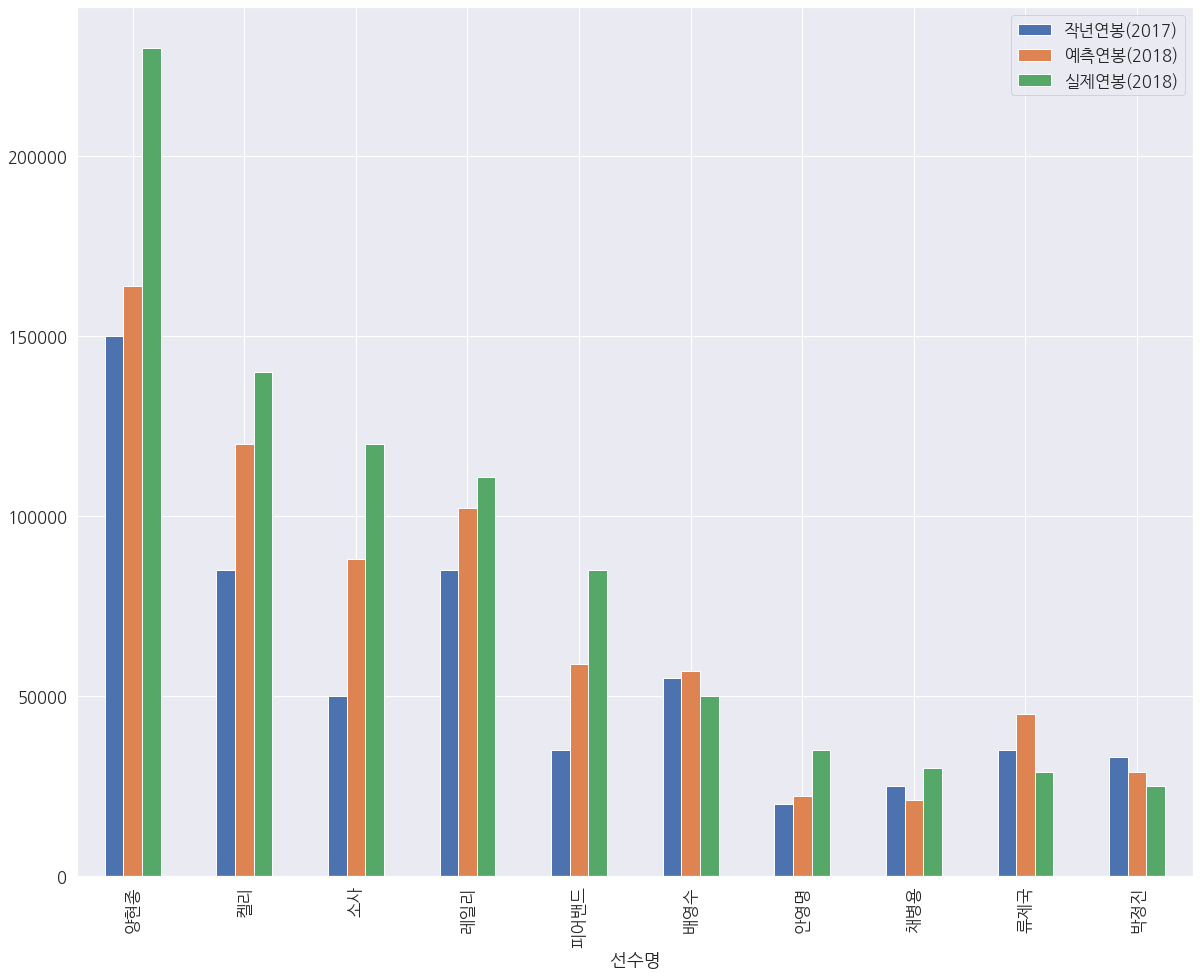

In [ ]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")